In [226]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

sns.set_theme()

In [159]:
a = pd.read_csv("../marked.csv")
b = pd.read_csv("../node_mutex.csv")

In [303]:
def transform_columns(data):
    if "map_name" in data.columns:
        data["map type"] = data["map_name"].str.split("\"").str[1]
    if "list_name" in data.columns:
        data["list type"] = data["list_name"].str.split("\"").str[1]
    data["# threads"] = data["num_threads"]
    data["time_per_num_elements"] = data["time"] / data["num_elements"]
    data["time_per_num_queries"] = data["time"] / data["num_queries"]
    data["time_per_num_queries_and_num_elements"] = data["time"] / data["num_queries"] / data["num_elements"]
    data["log_time_per_num_queries_and_num_elements"] = np.log2(data["time_per_num_queries_and_num_elements"])
    data["log_num_elements"] = np.log2(data["num_elements"])
    return data

In [256]:
df.columns

Index(['benchmark_name', 'map_name', 'num_elements', 'num_queries', 'time',
       'num_threads', 'time_per_num_elements'],
      dtype='object')

In [216]:
data = pd.concat([a, b], ignore_index=True)
data["list type"] = data["name"].str.split("_").str[:-1].str.join("_")
data["# threads"] = data["num_threads"]
data["time_per_elements"] = data["time"] / data["num_elements"]
data["time_per_query"] = data["time"] / data["num_queries"]
data["time_per_query_and_elements"] = data["time"] / data["num_queries"] / data["num_elements"]
data["log_time_per_query_and_elements"] = np.log2(data["time_per_query_and_elements"])
data["log_num_elements"] = np.log2(data["num_elements"])

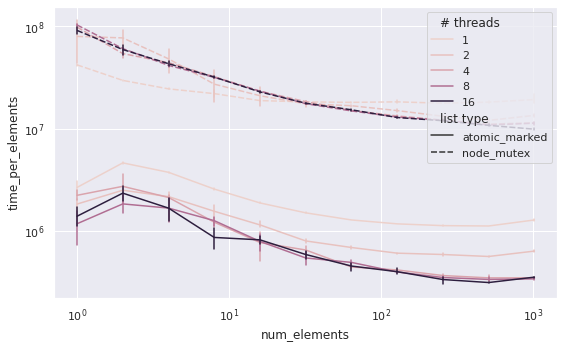

In [252]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.lineplot(data=data[data["num_threads"].isin((1,2,4,8,16))], x="num_elements", y="time_per_elements", hue="# threads", style="list type", err_style="bars", legend="full")
ax.set_xscale("log")
ax.set_yscale("log")
fig.tight_layout()

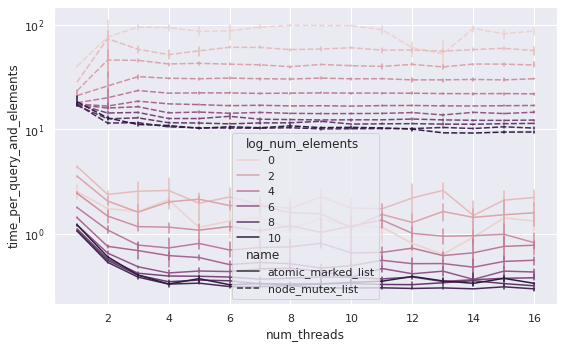

In [225]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.lineplot(data=data, x="num_threads", y="time_per_query_and_elements", hue="log_num_elements", style="name", err_style="bars")
ax.set_yscale("log")
fig.tight_layout()

In [320]:
df = pd.concat(map(pd.read_csv, Path("../cmake-build-release").glob("*_successful_find.csv")), ignore_index=True)
df = transform_columns(df)

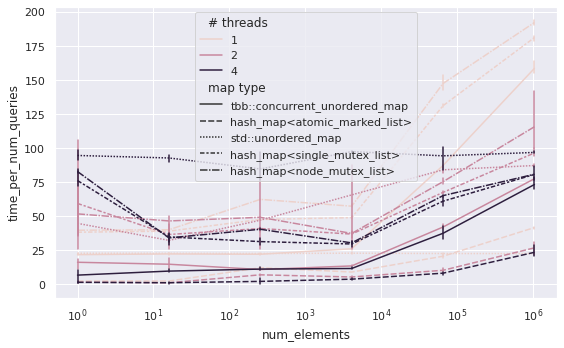

In [306]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.lineplot(data=df[df["num_threads"].isin((1,2,4,8,16))], x="num_elements", y="time_per_num_queries", hue="# threads", style="map type", err_style="bars")
ax.set_xscale("log")
#ax.set_yscale("log")
fig.tight_layout()

In [310]:
def plot_01(df):
    for num_threads in (1, 4):
        fig, ax = plt.subplots(figsize=(8, 5))
        sns.lineplot(data=df[df["num_threads"] == num_threads], x="num_elements", y="time_per_num_queries", hue="map type", err_style="bars")
        ax.set_xscale("log")
        #ax.set_yscale("log")
        fig.tight_layout()

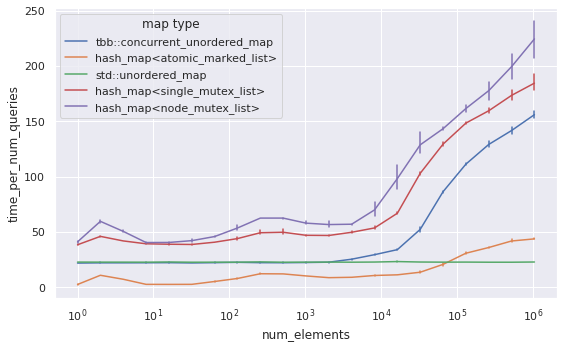

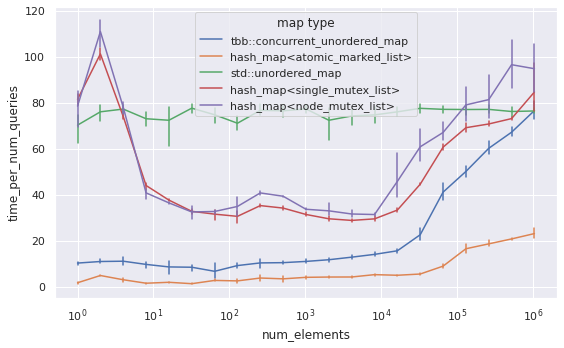

In [311]:
plot_01(df)

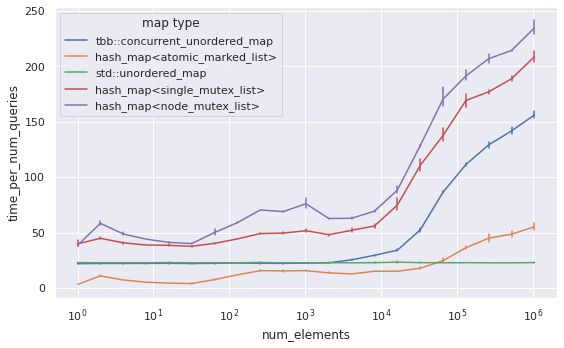

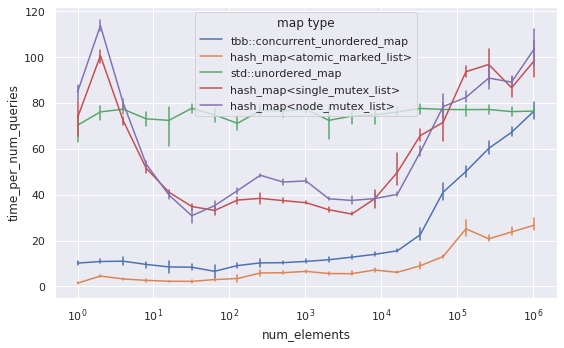

In [314]:
plot_01(df)

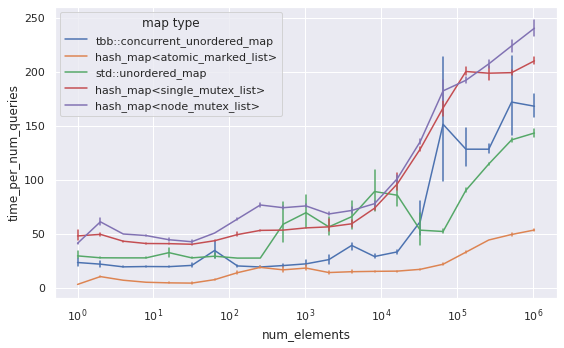

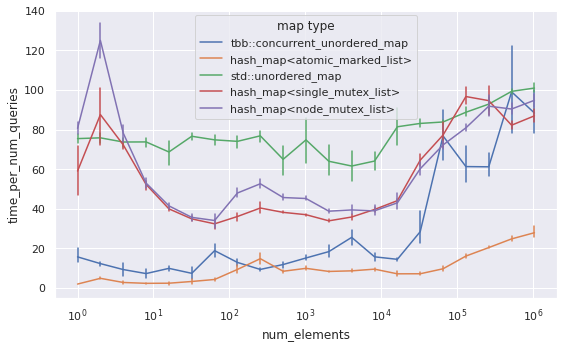

In [321]:
plot_01(df)

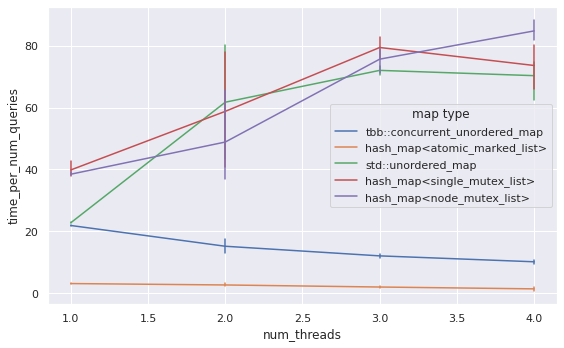

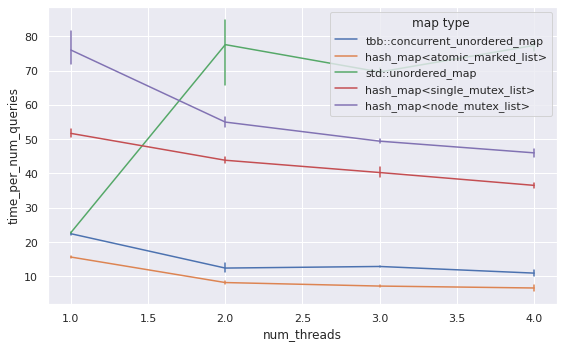

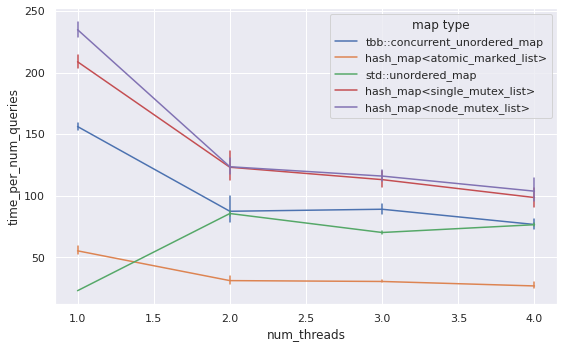

In [319]:
for num_elements in (2**0, 2**10, 2**20):
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.lineplot(data=df[df["num_elements"] == num_elements], x="num_threads", y="time_per_num_queries", hue="map type", err_style="bars")
    #ax.set_xscale("log")
    #ax.set_yscale("log")
    fig.tight_layout()